In [1]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

<AxesSubplot:xlabel='displ', ylabel='hwy'>

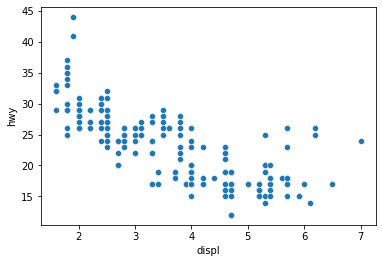

In [2]:
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

[(3.0, 6.0)]

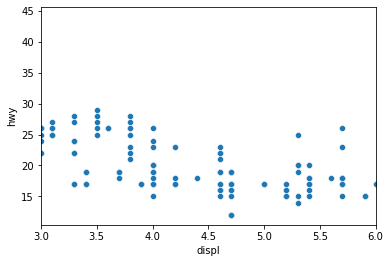

In [3]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
    .set(xlim = (3, 6))

[(3.0, 6.0), (10.0, 30.0)]

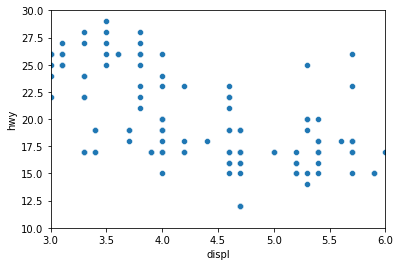

In [4]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
    .set(xlim = (3, 6), ylim = (10, 30))

<AxesSubplot:xlabel='displ', ylabel='hwy'>

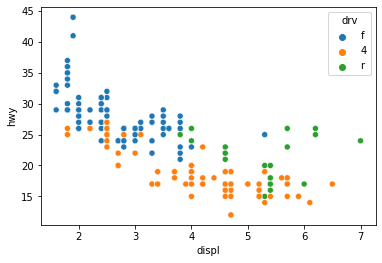

In [5]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

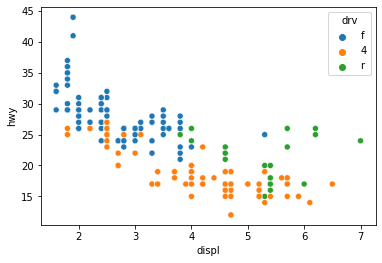

In [6]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv');

In [9]:
df_mpg = mpg.groupby('drv') \
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

mean_hwy
drv           
4    19.174757
f    28.160377
r    21.000000

In [10]:
df_mpg = mpg.groupby('drv', as_index = False) \
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

drv   mean_hwy
0   4  19.174757
1   f  28.160377
2   r  21.000000

<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

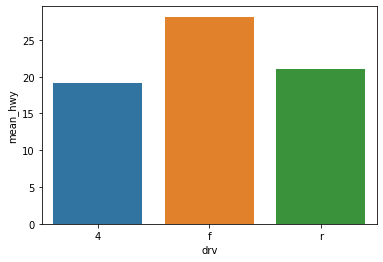

In [11]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

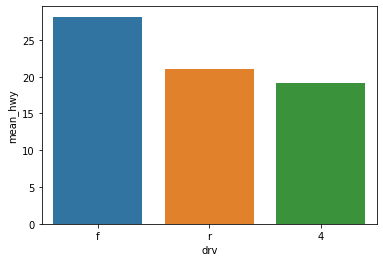

In [12]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)

sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

In [13]:
df_mpg = mpg.groupby('drv', as_index = False) \
            .agg(n = ('drv', 'count'))
df_mpg

drv    n
0   4  103
1   f  106
2   r   25

<AxesSubplot:xlabel='drv', ylabel='n'>

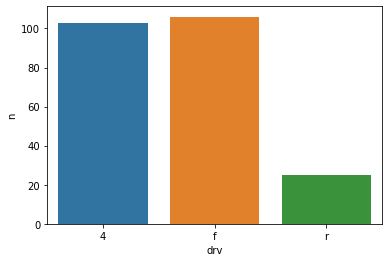

In [14]:
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

<AxesSubplot:xlabel='drv', ylabel='count'>

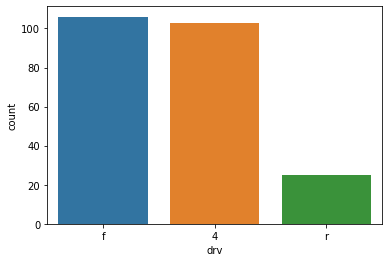

In [15]:
sns.countplot(data = mpg, x = 'drv')

<AxesSubplot:xlabel='drv', ylabel='count'>

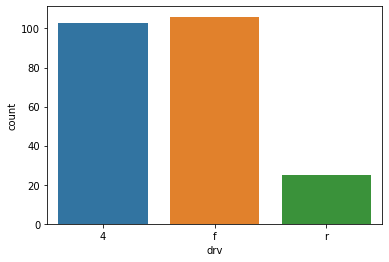

In [16]:
sns.countplot(data = mpg, x = 'drv', order = ['4', 'f', 'r'])

In [17]:
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object')

<AxesSubplot:xlabel='drv', ylabel='count'>

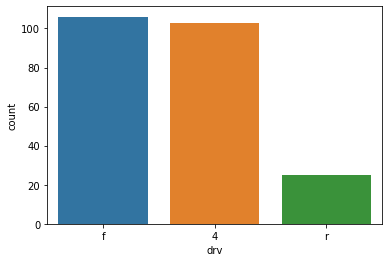

In [18]:
sns.countplot(data = mpg, x = 'drv', 
             order = mpg['drv'].value_counts().index)

In [19]:
economics = pd.read_csv('economics.csv')
economics.head()

date    pce       pop  psavert  uempmed  unemploy
0  1967-07-01  506.7  198712.0     12.6      4.5      2944
1  1967-08-01  509.8  198911.0     12.6      4.7      2945
2  1967-09-01  515.6  199113.0     11.9      4.6      2958
3  1967-10-01  512.2  199311.0     12.9      4.9      3143
4  1967-11-01  517.4  199498.0     12.8      4.7      3066

<AxesSubplot:xlabel='date', ylabel='unemploy'>

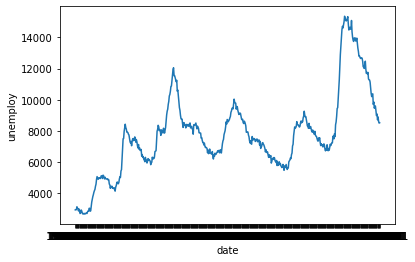

In [20]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [21]:
economics['date2'] = pd.to_datetime(economics['date'])

economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [22]:
economics[['date', 'date2']]

date      date2
0    1967-07-01 1967-07-01
1    1967-08-01 1967-08-01
2    1967-09-01 1967-09-01
3    1967-10-01 1967-10-01
4    1967-11-01 1967-11-01
..          ...        ...
569  2014-12-01 2014-12-01
570  2015-01-01 2015-01-01
571  2015-02-01 2015-02-01
572  2015-03-01 2015-03-01
573  2015-04-01 2015-04-01

[574 rows x 2 columns]

In [23]:
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [24]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [25]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

In [26]:
economics['year'] = economics['date2'].dt.year
economics.head()

date    pce       pop  psavert  uempmed  unemploy      date2  year
0  1967-07-01  506.7  198712.0     12.6      4.5      2944 1967-07-01  1967
1  1967-08-01  509.8  198911.0     12.6      4.7      2945 1967-08-01  1967
2  1967-09-01  515.6  199113.0     11.9      4.6      2958 1967-09-01  1967
3  1967-10-01  512.2  199311.0     12.9      4.9      3143 1967-10-01  1967
4  1967-11-01  517.4  199498.0     12.8      4.7      3066 1967-11-01  1967

<AxesSubplot:xlabel='year', ylabel='unemploy'>

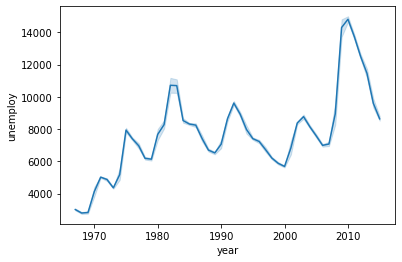

In [27]:
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

<AxesSubplot:xlabel='year', ylabel='unemploy'>

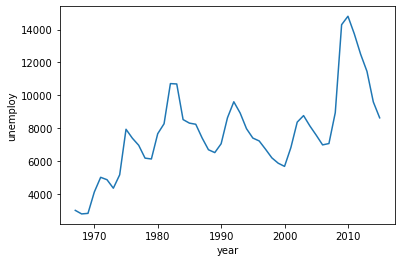

In [28]:
# 신뢰구간 제거
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)

<AxesSubplot:xlabel='drv', ylabel='hwy'>

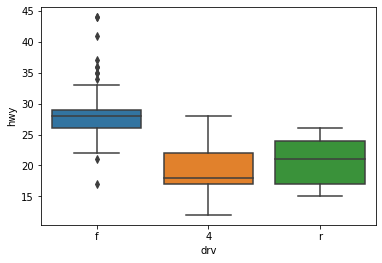

In [29]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')